In [188]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [189]:
def loadAndTransformData():
    students_2018 = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/luka-j/UpisDbMigrator/master/csvdata/ucenici2018.csv'))
    students_2019 = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/luka-j/UpisDbMigrator/master/csvdata/ucenici2019.csv'))
    students_2020 = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/luka-j/UpisDbMigrator/master/csvdata/ucenici2020.csv'))
    
    # As shown below, dataset contains columns such as id, sifra, broj_zelja etc. which are not 
    # relevant for this outlier detection so we can drop them. Also, we are droping rows that have NaN values.
    
    students_2018 = features(students_2018).dropna(axis=0)
    students_2019 = features(students_2019).dropna(axis=0)
    students_2020 = features(students_2020).dropna(axis=0)

    x_train = pd.concat([pd.DataFrame(students_2018), pd.DataFrame(students_2019)])
    x_test = pd.DataFrame(students_2020)

    # Droping rows that have average grade below 2 or that have final scores below 0, because that represents some kind of error in the data
    
    x_train = x_train[(x_train['geografija_p'] >= 2) & (x_train['biologija_p'] >= 2) & (x_train['matematika_p'] >= 2) & (x_train['istorija_p'] >= 2) & (x_train['fizika_p'] >= 2) & (x_train['srpski_p'] >= 2) & (x_train['hemija_p'] >= 2) & (x_train['matematika'] >= 0) & (x_train['srpski'] >= 0) & (x_train['kombinovani'] >= 0)]
    x_test = x_test[(x_test['geografija_p'] >= 2) & (x_test['biologija_p'] >= 2) & (x_test['matematika_p'] >= 2) & (x_test['istorija_p'] >= 2) & (x_test['fizika_p'] >= 2) & (x_test['srpski_p'] >= 2) & (x_test['hemija_p'] >= 2) & (x_test['matematika'] >= 0) & (x_test['srpski'] >= 0) & (x_test['kombinovani'] >= 0)]

    ss = StandardScaler()
    x_train_ss = pd.DataFrame(ss.fit_transform(x_train))
    x_test_ss = pd.DataFrame(ss.fit_transform(x_test))
    
    return x_train, x_test, x_train_ss, x_test_ss
    

In [190]:
def dropUnrelevantFeatures(data):
    new_data = data.drop(['id','sifra', 'drugi_strani_jezik','bodovi_sa_takmicenja', 'upisana_id', 'broj_zelja', 'upisana_zelja','krug', 'osnovna_id', 'vukova_diploma', 'prioritet', 'drugi_maternji6', 'drugi_maternji7', 'drugi_maternji8', 'drugi_maternji_p', 'maternji_jezik', 'prvi_strani_jezik', 'najbolji_blizanac_bodovi' ,'blizanac_sifra', 'bodova_am'], axis=1)
    return new_data

def features(data):
    new_data = data[['biologija_p', 'fizika_p', 'hemija_p', 'matematika_p', 'srpski_p', 'istorija_p', 'geografija_p', 'srpski', 'matematika', 'kombinovani', 'bodovi_sa_zavrsnog', 'bodovi_iz_skole']]
    return new_data

In [191]:
def plot(data,predicted, title, x, y, xLabel, yLabel):
    anom_index = np.where(predicted == -1)
    not_anom = np.where(predicted == 1)

    not_anomalies = data[[x, y]].iloc[not_anom]
    anomalies = data[[x, y]].iloc[anom_index]
    plt.scatter(not_anomalies[[x]],not_anomalies[[y]], alpha=0.2, label='Inliers')
    plt.scatter(anomalies[[x]],anomalies[[y]], color='r', alpha=0.2, label='Outliers')
    
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend(loc='upper left')
    plt.show()

In [192]:
# Columns that one dataset has

students_2018 = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/luka-j/UpisDbMigrator/master/csvdata/ucenici2018.csv'))
students_2018.columns

Index(['id', 'sifra', 'drugi_strani_jezik', 'likovno6', 'tehnicko6',
       'geografija6', 'biologija6', 'sport6', 'drugi_strani6', 'matematika6',
       'istorija6', 'engleski6', 'muzicko6', 'fizicko6', 'vladanje6',
       'fizika6', 'srpski6', 'likovno7', 'tehnicko7', 'geografija7',
       'biologija7', 'sport7', 'drugi_strani7', 'matematika7', 'istorija7',
       'engleski7', 'muzicko7', 'fizicko7', 'vladanje7', 'fizika7', 'srpski7',
       'hemija7', 'likovno8', 'tehnicko8', 'geografija8', 'biologija8',
       'sport8', 'drugi_strani8', 'matematika8', 'istorija8', 'engleski8',
       'muzicko8', 'fizicko8', 'vladanje8', 'fizika8', 'srpski8', 'hemija8',
       'likovno_p', 'tehnicko_p', 'geografija_p', 'biologija_p', 'sport_p',
       'drugi_strani_p', 'matematika_p', 'istorija_p', 'engleski_p',
       'muzicko_p', 'fizicko_p', 'vladanje_p', 'fizika_p', 'srpski_p',
       'hemija_p', 'prosek_sesti', 'prosek_sedmi', 'prosek_osmi',
       'prosek_ukupno', 'matematika', 'srpski', 'komb

In [193]:
# Loading data

x_train_plt, x_test_plt, x_train, x_test = loadAndTransformData()

In [194]:
# OneClassSVM for outlier detection

svm = OneClassSVM(nu=0.005, kernel='rbf', gamma='scale')
svm.fit(x_train)

OneClassSVM(nu=0.005)

In [195]:
svm_pred = svm.predict(x_train)
svm_test_pred = svm.predict(x_test)

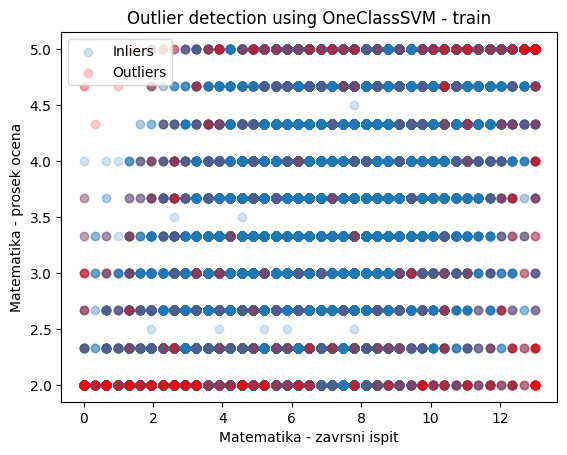

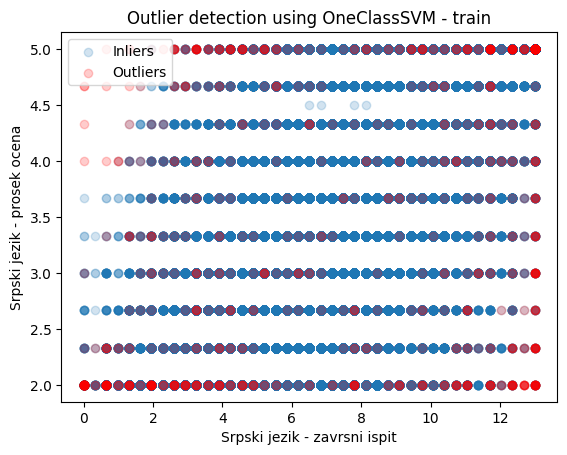

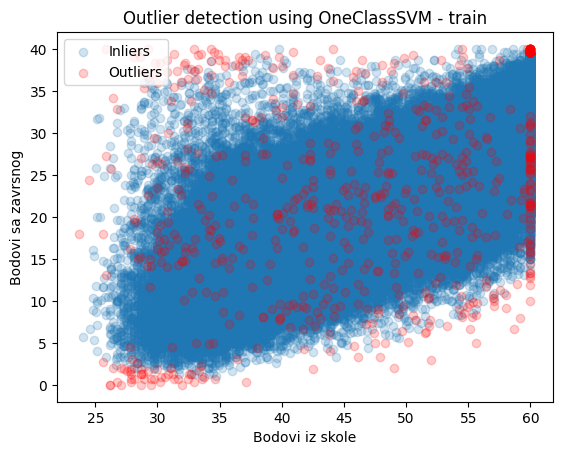

In [196]:
plot(x_train_plt, svm_pred, 'Outlier detection using OneClassSVM - train', 'matematika', 'matematika_p', 'Matematika - zavrsni ispit', 'Matematika - prosek ocena')
plot(x_train_plt, svm_pred, 'Outlier detection using OneClassSVM - train', 'srpski', 'srpski_p', 'Srpski jezik - zavrsni ispit', 'Srpski jezik - prosek ocena')
plot(x_train_plt, svm_pred, 'Outlier detection using OneClassSVM - train', 'bodovi_iz_skole', 'bodovi_sa_zavrsnog', 'Bodovi iz skole', 'Bodovi sa zavrsnog')

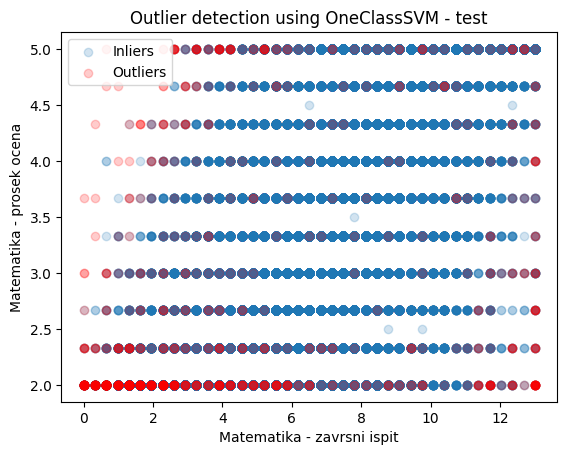

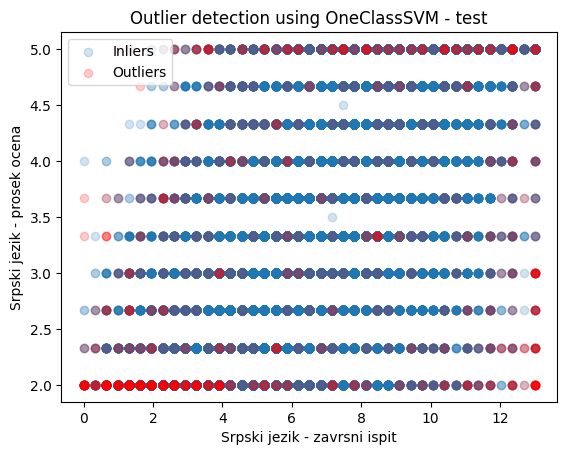

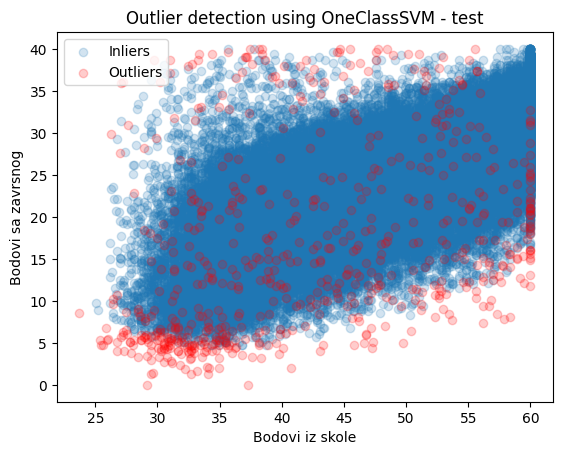

In [197]:
plot(x_test_plt,svm_test_pred, 'Outlier detection using OneClassSVM - test', 'matematika', 'matematika_p', 'Matematika - zavrsni ispit', 'Matematika - prosek ocena')
plot(x_test_plt,svm_test_pred, 'Outlier detection using OneClassSVM - test', 'srpski', 'srpski_p', 'Srpski jezik - zavrsni ispit', 'Srpski jezik - prosek ocena')
plot(x_test_plt,svm_test_pred, 'Outlier detection using OneClassSVM - test', 'bodovi_iz_skole', 'bodovi_sa_zavrsnog', 'Bodovi iz skole', 'Bodovi sa zavrsnog')

In [198]:
# Autlajeri koje ovaj model detektuje ne odgovaraju autlajerima koje bismo mogli da ocekujemo na ovim podacima, sto se moze videti 
# sa slika iznad. Model ima tendenciju da bira instance koje su ekstremne po nekim osobinama, ali koje ne predstavljaju nuzno autlajere za 
# dati problem (npr. ukoliko ucenik ima niske ocene iz svih predmeta i broj bodova na zavrsnom, nama takva instanca nije zanimljiva, a ovaj 
# model ga izdvaja).  